Assignment 2 ->> Use Linear Regression to Predict House Price from Size and also Draw and epoch vs Accuracy Graph

In [129]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("house_price.csv") #This is the dataset I have taken from kaggle-> https://www.kaggle.com/datasets/snehasishdhar/simple-house-price-prediction

In [131]:
df.head(10)

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [132]:
X_train= df[['area']].values  # I have only considered the area
y_train= df[['price']].values

In [133]:
X_train.shape,y_train.shape    #X_train.shape = (47, 1) means the training input data has 47 samples with 1 feature each (area)
#y_train.shape = (47, 1)means the training output data has 47 corresponding target values (price)

((47, 1), (47, 1))

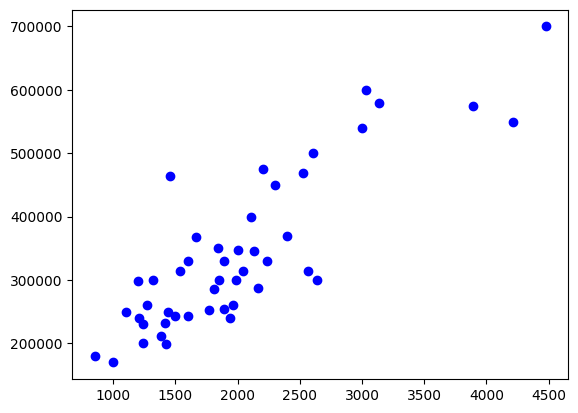

In [134]:
plt.scatter(X, y, color='blue')
plt.show()# from the graph we can clearly see that there is linear pattern 

In [135]:
X_train = (X_train - X_train.mean()) / X_train.std() #We are rescaling the “area” values so they are easier for the model to work with
#It helps gradient descent learn faster and more accurately

In [136]:
X_train

array([[ 1.31415422e-01],
       [-5.09640698e-01],
       [ 5.07908699e-01],
       [-7.43677059e-01],
       [ 1.27107075e+00],
       [-1.99450507e-02],
       [-5.93588523e-01],
       [-7.29685755e-01],
       [-7.89466782e-01],
       [-6.44465993e-01],
       [-7.71822042e-02],
       [-8.65999486e-04],
       [-1.40779041e-01],
       [ 3.15099326e+00],
       [-9.31923697e-01],
       [ 3.80715024e-01],
       [-8.65782986e-01],
       [-9.72625673e-01],
       [ 7.73743478e-01],
       [ 1.31050078e+00],
       [-2.97227261e-01],
       [-1.43322915e-01],
       [-5.04552951e-01],
       [-4.91995958e-02],
       [ 2.40309445e+00],
       [-1.14560907e+00],
       [-6.90255715e-01],
       [ 6.68172729e-01],
       [ 2.53521350e-01],
       [ 8.09357707e-01],
       [-2.05647815e-01],
       [-1.27280274e+00],
       [ 5.00114703e-02],
       [ 1.44532608e+00],
       [-2.41262044e-01],
       [-7.16966387e-01],
       [-9.68809863e-01],
       [ 1.67029651e-01],
       [ 2.8

This function implements batch gradient descent for linear regression. It begins by initializing the weights (w) and bias (b) with starting values and then repeatedly improves them over a set number of epochs. In each epoch, the model first predicts outputs using the current values of w and b. It then calculates the error by comparing predictions with the actual values and computes the gradients, which indicate how much the weights and bias should be adjusted to reduce the error. Using these gradients, the function updates w and b by taking small steps in the opposite direction of the error, controlled by the learning rate. After each update, it calculates the cost (mean squared error) to measure how well the model is fitting the data, and every 10 epochs it stores the cost for tracking progress. Over time, this process gradually reduces the error, resulting in values of w and b that define the best-fitting line for the given data

In [137]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    n_samples, n_features = X.shape
    w = np.ones(n_features)  
    b = 0                    
    cost_list = []
    epoch_list = []
    y_true = y_true.ravel()
    for i in range(epochs):
        y_predicted = np.dot(X, w) + b
        w_grad = -(2/n_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2/n_samples) * np.sum(y_true - y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.mean((y_true - y_predicted) ** 2)
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost_list, epoch_list

In [138]:
w, b, cost_list, epoch_list = batch_gradient_descent(X_train, y_train, epochs=500, learning_rate=0.01)

In [139]:
print("Slope:", w)
print("Intercept:", b)

Slope: [105759.7946676]
Intercept: 340398.69449057826


In [140]:
y_test_pred = np.dot(X_train, w) + b

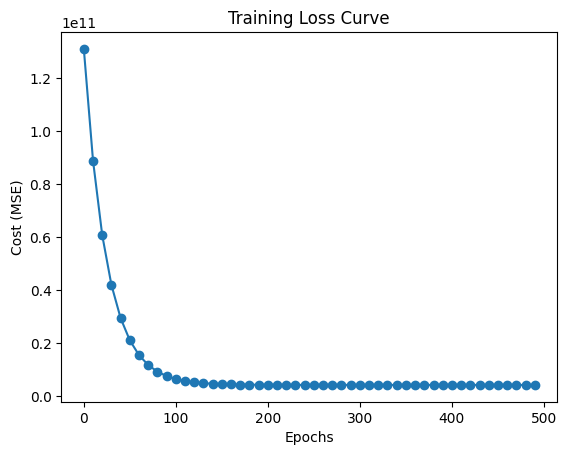

In [141]:
plt.plot(epoch_list, cost_list, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.title("Training Loss Curve")
plt.show()

The training loss curve shows how the model’s error decreases over time as it learns. At the beginning, the cost is very high because the model starts with poor estimates for the weights and bias. As training progresses through more epochs, the model gradually adjusts these parameters, and the error drops quickly. After a certain point, the curve begins to flatten out, indicating that the model has learned most of the patterns in the data and further training no longer brings significant improvement. This flattening means the model has reached a point close to the minimum error, resulting in a stable and well-fitted line for the datase

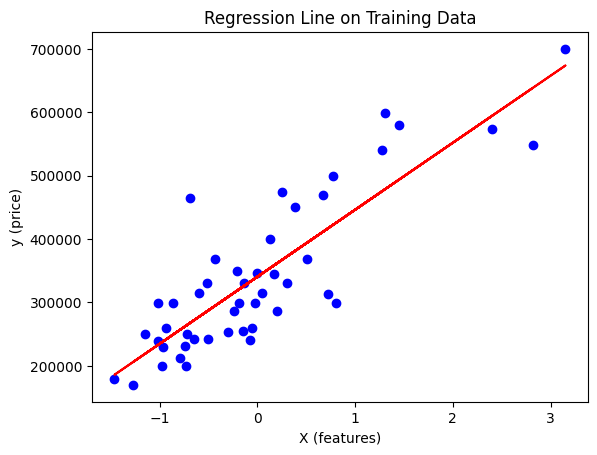

In [142]:

plt.scatter(X_train, y_train, color="blue") 
plt.plot(X_train, y_test_pred, color="red") 
plt.xlabel("X (features)")
plt.ylabel("y (price)")
plt.title("Regression Line on Training Data")
plt.show()

The blue dots are the actual data points, where the x-axis represents the input feature (area, after standardization) and the y-axis represents the actual house price. Each dot is one training example.The red line is the regression line that the model has learned. It represents the model’s predictions for price given the area. The line goes through the data in such a way that it minimizes the overall distance between itself and all the blue points.If a blue dot is close to the red line, it means the model predicted that house price quite accurately. If it’s farther away, the model’s prediction was less accurate. Overall, since the red line captures the upward trend of the points (bigger area → higher price), it shows that the model has learned the relationship between area and price reasonably well.